In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
KITTI_PATH = '/home/lucas/repos/PointPillars/kitti'
KITTI_DB_INFOS_TRAIN = pd.read_pickle(f'{KITTI_PATH}/kitti_dbinfos_train.pkl')
KITTI_INFOS_VAL = pd.read_pickle(f'{KITTI_PATH}/kitti_infos_val.pkl')
KITTI_INFOS_TEST = pd.read_pickle(f'{KITTI_PATH}/kitti_infos_test.pkl')
KITTI_INFOS_TRAIN = pd.read_pickle(f'{KITTI_PATH}/kitti_infos_train.pkl')
BATCH_SIZE = 4
NUM_WORKERS = 4


In [12]:
print(len(KITTI_DB_INFOS_TRAIN))
print(KITTI_DB_INFOS_TRAIN.keys())
for key in KITTI_DB_INFOS_TRAIN.keys():
    print(f"{key}: {type(KITTI_DB_INFOS_TRAIN[key])}, {len(KITTI_DB_INFOS_TRAIN[key])}")
    print(KITTI_DB_INFOS_TRAIN[key][0])


8
dict_keys(['Pedestrian', 'Car', 'Cyclist', 'Van', 'Truck', 'Tram', 'Misc', 'Person_sitting'])
Pedestrian: <class 'list'>, 2207
{'name': 'Pedestrian', 'path': 'kitti_gt_database/0_Pedestrian_0.bin', 'box3d_lidar': array([ 8.731381 , -1.8559175, -1.5996994,  0.48     ,  1.2      ,
        1.89     ,  0.01     ], dtype=float32), 'difficulty': 0, 'num_points_in_gt': 377}
Car: <class 'list'>, 14357
{'name': 'Car', 'path': 'kitti_gt_database/3_Car_0.bin', 'box3d_lidar': array([13.510703 , -0.98178  , -1.6944898,  1.73     ,  4.15     ,
        1.57     ,  1.62     ], dtype=float32), 'difficulty': 0, 'num_points_in_gt': 674}
Cyclist: <class 'list'>, 734
{'name': 'Cyclist', 'path': 'kitti_gt_database/7_Cyclist_3.bin', 'box3d_lidar': array([34.377724 , 12.651429 , -1.4623766,  0.5      ,  1.95     ,
        1.72     ,  1.54     ], dtype=float32), 'difficulty': 1, 'num_points_in_gt': 25}
Van: <class 'list'>, 1297
{'name': 'Van', 'path': 'kitti_gt_database/12_Van_1.bin', 'box3d_lidar': array([6

In [4]:
from pointpillars.dataset import Kitti, get_dataloader
train_dataset = Kitti(data_root=KITTI_PATH,
                          split='train')
train_dataloader = get_dataloader(dataset=train_dataset, 
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True)

In [1]:
from tbparse import SummaryReader
# The log_dir can be the directory containing event files or a specific event file itself
LOG_DIR = '/home/wuyuren/repos/PointPillars/pillar_logs'
reader = SummaryReader(LOG_DIR)

# Read scalar summaries into a pandas DataFrame
df_scalars = reader.scalars

# Print the DataFrame
print("Scalar Summaries:")
print(df_scalars)


Scalar Summaries:
        step             tag     value
0          8              lr  0.000250
1          8              lr  0.000250
2          8              lr  0.000250
3          8              lr  0.000250
4          8              lr  0.000250
...      ...             ...       ...
85457  76872  val/total_loss  0.712233
85458  76880  val/total_loss  0.333854
85459  76888  val/total_loss  0.492243
85460  76896  val/total_loss  0.787397
85461  76904  val/total_loss  0.506911

[85462 rows x 3 columns]


In [8]:
df_scalars['tag'].unique()

array(['lr', 'momentum', 'train/cls_loss', 'train/dir_cls_loss',
       'train/reg_loss', 'train/total_loss', 'val/cls_loss',
       'val/dir_cls_loss', 'val/reg_loss', 'val/total_loss'], dtype=object)

In [ ]:
df_wide = df_scalars.pivot_table(index='step', columns='tag', values='value')

# Reset index so 'step' is a column
df_wide = df_wide.reset_index()

# Show the first few rows
print(df_wide.head())


tag  step       lr  momentum  train/cls_loss  train/dir_cls_loss  \
0       8  0.00025      0.95        1.015702            0.725297   
1      16  0.00025      0.95        0.910931            0.725678   
2      24  0.00025      0.95        0.878549            0.720871   
3      32  0.00025      0.95        0.814920            0.706879   
4      40  0.00025      0.95        0.780756            0.707408   

tag  train/reg_loss  train/total_loss  val/cls_loss  val/dir_cls_loss  \
0          1.439509          4.039780           NaN               NaN   
1          1.216778          3.489623           NaN               NaN   
2          1.086390          3.195503           NaN               NaN   
3          1.035041          3.026378           NaN               NaN   
4          1.014034          2.950305           NaN               NaN   

tag  val/reg_loss  val/total_loss  
0             NaN             NaN  
1             NaN             NaN  
2             NaN             NaN  
3       

In [7]:
df_scalars=df_scalars[df_scalars['step']>40000]
df_train_total_loss = df_scalars[df_scalars['tag'] == 'train/total_loss'].sort_values(by='step')
df_val_total_loss = df_scalars[df_scalars['tag'] == 'val/total_loss'].sort_values(by='step')
df_train_cls_loss = df_scalars[df_scalars['tag'] == 'train/cls_loss'].sort_values(by='step')
df_train_reg_loss = df_scalars[df_scalars['tag'] == 'train/reg_loss'].sort_values(by='step')
dr_train_dir_cls_loss = df_scalars[df_scalars['tag'] == 'train/dir_cls_loss'].sort_values(by='step')
df_val_dir_cls_loss = df_scalars[df_scalars['tag'] == 'val/dir_cls_loss'].sort_values(by='step')
df_val_cls_loss = df_scalars[df_scalars['tag'] == 'val/cls_loss'].sort_values(by='step')
df_val_reg_loss = df_scalars[df_scalars['tag'] == 'val/reg_loss'].sort_values(by='step')


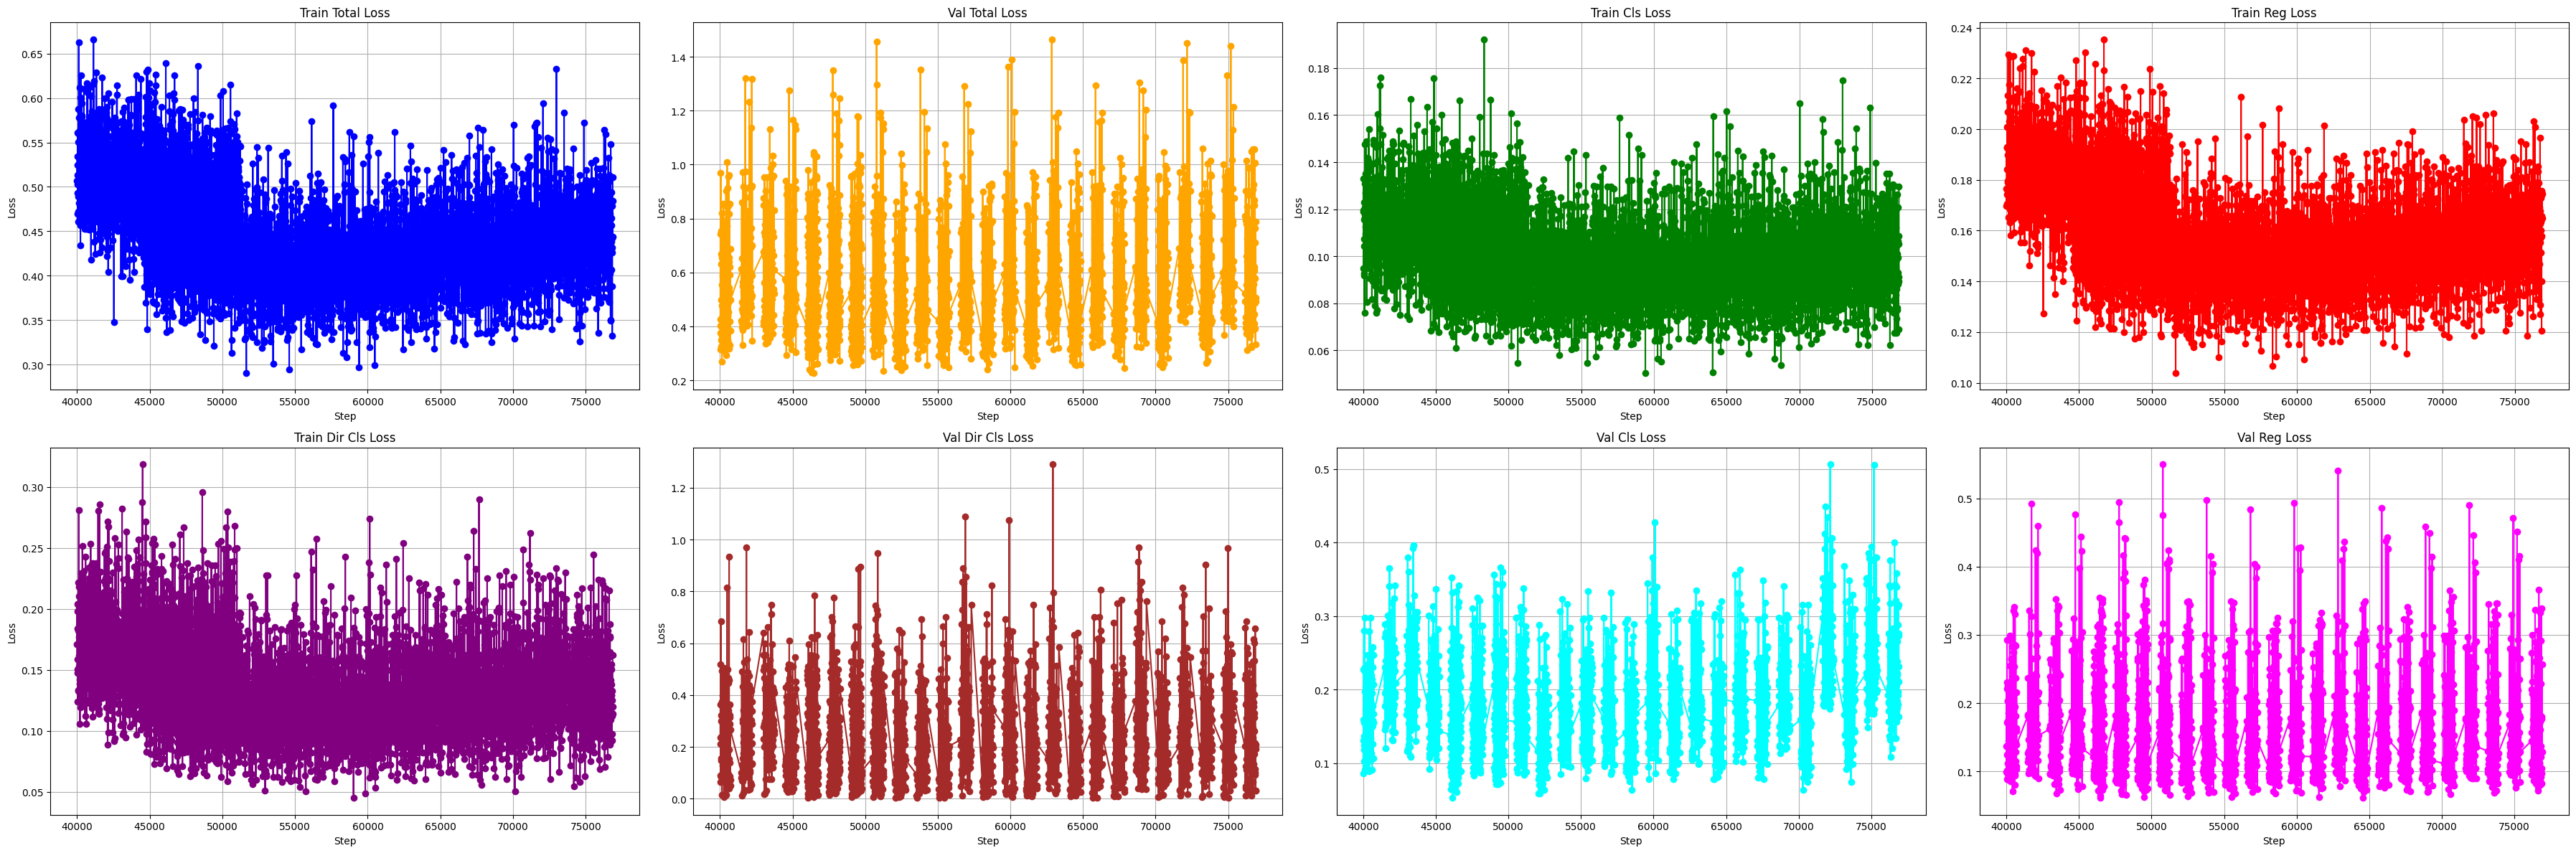

In [8]:
# Plot all loss curves in subplots
plt.figure(figsize=(36, 12))

# 1. Train total loss
plt.subplot(2, 4, 1)
plt.plot(df_train_total_loss['step'], df_train_total_loss['value'], marker='o', color='blue')
plt.title('Train Total Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)

# 2. Val total losscd 
plt.subplot(2, 4, 2)
plt.plot(df_val_total_loss['step'], df_val_total_loss['value'], marker='o', color='orange')
plt.title('Val Total Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)

# 3. Train cls loss
plt.subplot(2, 4, 3)
plt.plot(df_train_cls_loss['step'], df_train_cls_loss['value'], marker='o', color='green')
plt.title('Train Cls Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)

# 4. Train reg loss
plt.subplot(2, 4, 4)
plt.plot(df_train_reg_loss['step'], df_train_reg_loss['value'], marker='o', color='red')
plt.title('Train Reg Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)

# 5. Train dir cls loss
plt.subplot(2, 4, 5)
plt.plot(dr_train_dir_cls_loss['step'], dr_train_dir_cls_loss['value'], marker='o', color='purple')
plt.title('Train Dir Cls Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)

# 6. Val dir cls loss
plt.subplot(2, 4, 6)
plt.plot(df_val_dir_cls_loss['step'], df_val_dir_cls_loss['value'], marker='o', color='brown')
plt.title('Val Dir Cls Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)

# 7. Val cls loss
plt.subplot(2, 4, 7)
plt.plot(df_val_cls_loss['step'], df_val_cls_loss['value'], marker='o', color='cyan')
plt.title('Val Cls Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)

# 8. Val reg loss
plt.subplot(2, 4, 8)
plt.plot(df_val_reg_loss['step'], df_val_reg_loss['value'], marker='o', color='magenta')
plt.title('Val Reg Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import dataframe as df
evaluation_results = df.read_pickle('/home/wuyuren/repos/PointPillars/results/evaluation_results.pkl')


In [ ]:
import os
import open3d as o3d
import numpy as np
def numpy_to_point_cloud(points):
    """
    Convert a numpy array of points to an Open3D PointCloud object.
    input points: Nx4 numpy array where the first three columns are XYZ coordinates
    and the fourth column is the density or intensity value.
    """
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points[:, :3])  # Use only the first three columns for XYZ
    density = points[:, 3]
    # use the same value in desntiy for RGB color, effectively making the point cloud grayscale
    colors = [[item, item, item] for item in density]
    pcd.colors = o3d.utility.Vector3dVector(colors)
    return pcd

def point_range_filter(pts, point_range=[0, -39.68, -3, 69.12, 39.68, 1]):
    '''
    data_dict: dict(pts, gt_bboxes_3d, gt_labels, gt_names, difficulty)
    point_range: [x1, y1, z1, x2, y2, z2]
    '''
    flag_x_low = pts[:, 0] > point_range[0]
    flag_y_low = pts[:, 1] > point_range[1]
    flag_z_low = pts[:, 2] > point_range[2]
    flag_x_high = pts[:, 0] < point_range[3]
    flag_y_high = pts[:, 1] < point_range[4]
    flag_z_high = pts[:, 2] < point_range[5]
    keep_mask = flag_x_low & flag_y_low & flag_z_low & flag_x_high & flag_y_high & flag_z_high
    pts = pts[keep_mask]
    return pts 

def write_ply_file(kitti_root = "0.6",bin_file_folder = "velodyne", ply_file_folder = "ply", max_file_cnt = None):
    KITT_ROOT = kitti_root
    bin_file_path = os.path.join(KITT_ROOT, "training", bin_file_folder)
    ply_file_path = os.path.join(KITT_ROOT, "training",  ply_file_folder)
    os.makedirs(ply_file_path, exist_ok=True)
    count = 0
    for file in sorted(os.listdir(bin_file_path)):
        count += 1
        if max_file_cnt and count >= max_file_cnt:
            break
        if file.endswith(".bin"):
            bin_file = os.path.join(bin_file_path, file)
            ply_file = os.path.join(ply_file_path, file.replace(".bin", ".ply"))
            if os.path.exists(ply_file):
                continue
            points = point_range_filter(
                np.fromfile(bin_file, dtype=np.float32).reshape(-1, 4)
            )
            pcd = numpy_to_point_cloud(points)
            o3d.io.write_point_cloud(ply_file, pcd)
            print(f"Converted {file} to {ply_file}")